Cargando librerías

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [396]:
options(digits=4, big.mark = ',', repr.plot.width=22, repr.plot.height=8)

Cargando datos

In [458]:
marg_index <- read.csv('Base_Indice_de_marginacion_municipal.csv')

months <- c('January','February','March','April','May','June','July','August','September','October','November','December')

delitos <- readRDS('datos_delitos.rds') %>%
    mutate(categoria_delito = factor(categoria_delito),
           alcaldia_hechos = factor(alcaldia_hechos),
           año = factor(format(fecha_hechos,'%Y')),
           mes = factor(format(fecha_hechos,'%B'), level = months),
           CVE_MUN = case_when(
               alcaldia_hechos == 'ALVARO OBREGON' ~ 9010,
               alcaldia_hechos == 'AZCAPOTZALCO' ~ 9002,
               alcaldia_hechos == 'BENITO JUAREZ' ~ 9014,
               alcaldia_hechos == 'COYOACAN' ~ 9003,
               alcaldia_hechos == 'CUAJIMALPA DE MORELOS' ~ 9004,
               alcaldia_hechos == 'CUAUHTEMOC' ~ 9015,
               alcaldia_hechos == 'GUSTAVO A MADERO' ~ 9005,
               alcaldia_hechos == 'IZTACALCO' ~ 9006,
               alcaldia_hechos == 'IZTAPALAPA' ~ 9007,
               alcaldia_hechos == 'LA MAGDALENA CONTRERAS' ~ 9008,
               alcaldia_hechos == 'MIGUEL HIDALGO' ~ 9016,
               alcaldia_hechos == 'MILPA ALTA' ~ 9009,
               alcaldia_hechos == 'TLAHUAC' ~ 9011,
               alcaldia_hechos == 'TLALPAN' ~ 9012,
               alcaldia_hechos == 'VENUSTIANO CARRANZA' ~ 9017,
               alcaldia_hechos == 'XOCHIMILCO' ~ 9013)) %>%
    select(CVE_MUN, año, mes, alcaldia_hechos,categoria_delito)

# Tabla de denuncias totales agrupadas por mes y delegación (Enero 2017 - Junio 2019)

In [459]:
delitos %>%
    group_by(alcaldia_hechos, año, mes) %>%
    tally(sort = TRUE) %>%
    with(sapply(split(n,alcaldia_hechos),summary)) %>%
    t() %>%
    format(digits = 2, big.mark = ',') %>%
    as.data.frame() %>%
    rownames_to_column(var = 'Alcaldía')

Alcaldía,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
ALVARO OBREGON,"1,031","1,168","1,276","1,256","1,351","1,472"
AZCAPOTZALCO,674,880,920,926,990,"1,069"
BENITO JUAREZ,"1,241","1,609","1,686","1,680","1,789","2,112"
COYOACAN,994,"1,176","1,278","1,261","1,357","1,491"
CUAJIMALPA DE MORELOS,207,247,266,265,279,330
CUAUHTEMOC,"2,148","2,782","3,039","2,967","3,177","3,513"
GUSTAVO A MADERO,"1,452","1,828","1,920","1,885","2,006","2,130"
IZTACALCO,646,763,840,834,908,"1,027"
IZTAPALAPA,"2,257","2,642","2,794","2,780","2,920","3,088"


# Tabla de denuncias totales agrupadas por mes y tipo de delito (Enero 2017 - Junio 2019)

In [460]:
delitos %>%
    group_by(categoria_delito, año, mes) %>%
    tally(sort = TRUE) %>%
    with(sapply(split(n,categoria_delito),summary)) %>%
    t() %>%
    format(digits = 2, big.mark = ',') %>%
    as.data.frame() %>%
    rownames_to_column(var = 'Delito')

Delito,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
DELITO DE BAJO IMPACTO,"11,564.0","13,906.8","14,683.0","14,803.7","16,257.0","17,633.0"
HECHO NO DELICTIVO,236.0,555.0,"1,288.0","1,060.3","1,445.2","1,651.0"
HOMICIDIO DOLOSO,62.0,81.0,94.5,95.8,107.5,147.0
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,48.0,71.0,78.5,77.4,86.8,105.0
ROBO A CASA HABITACIÓN CON VIOLENCIA,28.0,34.2,39.0,43.9,49.8,76.0
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA,11.0,24.5,30.5,33.5,39.8,61.0
ROBO A NEGOCIO CON VIOLENCIA,147.0,216.5,251.5,291.6,347.0,590.0
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA,43.0,54.2,59.5,67.2,78.5,121.0
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,5.0,12.2,15.5,17.5,19.8,48.0


# Tabla de denuncias totales agrupadas por mes y año (Enero 2017 - Junio 2019)

In [461]:
delitos %>%
    group_by(año, mes) %>%
    tally(sort = TRUE) %>%
    with(sapply(split(n,año),summary)) %>%
    t() %>%
    format(digits = 2, big.mark = ',') %>%
    as.data.frame() %>%
    rownames_to_column(var = 'Año')

Año,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2017,"15,643","17,470","18,253","18,002","18,660","19,882"
2018,"18,391","19,446","19,948","19,904","20,279","21,620"
2019,"15,045","15,947","18,339","17,652","18,847","20,022"


# Tabla de denuncias totales agrupadas por mes (Enero 2017 - Junio 2019)

In [462]:
delitos %>%
    group_by(año, mes) %>%
    tally(sort = TRUE) %>%
    with(sapply(split(n,mes),summary)) %>%
    t() %>%
    format(digits = 2, big.mark = ',') %>%
    as.data.frame() %>%
    rownames_to_column(var = 'Mes')

Mes,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
January,"15,045","15,822","16,598","16,678","17,494","18,391"
February,"15,643","17,125","18,607","17,636","18,632","18,658"
March,"17,761","18,892","20,022","19,313","20,088","20,155"
April,"16,448","17,260","18,071","18,109","18,940","19,808"
May,"18,897","18,912","18,927","19,691","20,088","21,248"
June,"15,239","16,890","18,542","17,876","19,194","19,847"
July,"18,402","18,818","19,234","19,234","19,651","20,067"
August,"19,226","19,582","19,938","19,938","20,294","20,650"
September,"18,104","18,505","18,906","18,906","19,307","19,708"


# Tabla de denuncias totales (Enero 2017 - Junio 2019) e indice de marginación de 2015 y población 2015

In [463]:
denuncias <- delitos %>%
    group_by(CVE_MUN,alcaldia_hechos) %>%
    tally(sort = TRUE) %>%
    inner_join(marg_index, by = 'CVE_MUN') %>%
    select(CVE_MUN, alcaldia_hechos, n, POB_TOT,IM) %>%
    rename(`Alcaldía` = alcaldia_hechos, `Delitos` = n, `Población`= POB_TOT)
denuncias

CVE_MUN,Alcaldía,Delitos,Población,IM
<dbl>,<fct>,<int>,<int>,<dbl>
9015,CUAUHTEMOC,89016,532553,-1.951
9007,IZTAPALAPA,83399,1827868,-1.627
9005,GUSTAVO A MADERO,56542,1164477,-1.728
9014,BENITO JUAREZ,50386,417416,-2.228
9016,MIGUEL HIDALGO,38128,364439,-2.131
9003,COYOACAN,37835,608479,-1.994
9010,ALVARO OBREGON,37670,749982,-1.779
9017,VENUSTIANO CARRANZA,32850,427263,-1.811
9012,TLALPAN,32148,677104,-1.738


In [415]:
cor(denuncias[,3:5])

,Delitos,Población,IM
Delitos,1.0000,0.71309,-0.41621
Población,0.7131,1.00000,-0.01791
IM,-0.4162,-0.01791,1.00000


Cómo se puede apreciar, existe una alta correlación entre la cantidad de delitos denunciados el tamaño de la población, pero no es tan alta entre el número de delitos denunciados y el índice de marginación, y es más débil entre el el tamaño de población y el índice de marginación.

# Relación entre el índice de marginación y el número de delitos por alcaldía en la CDMX

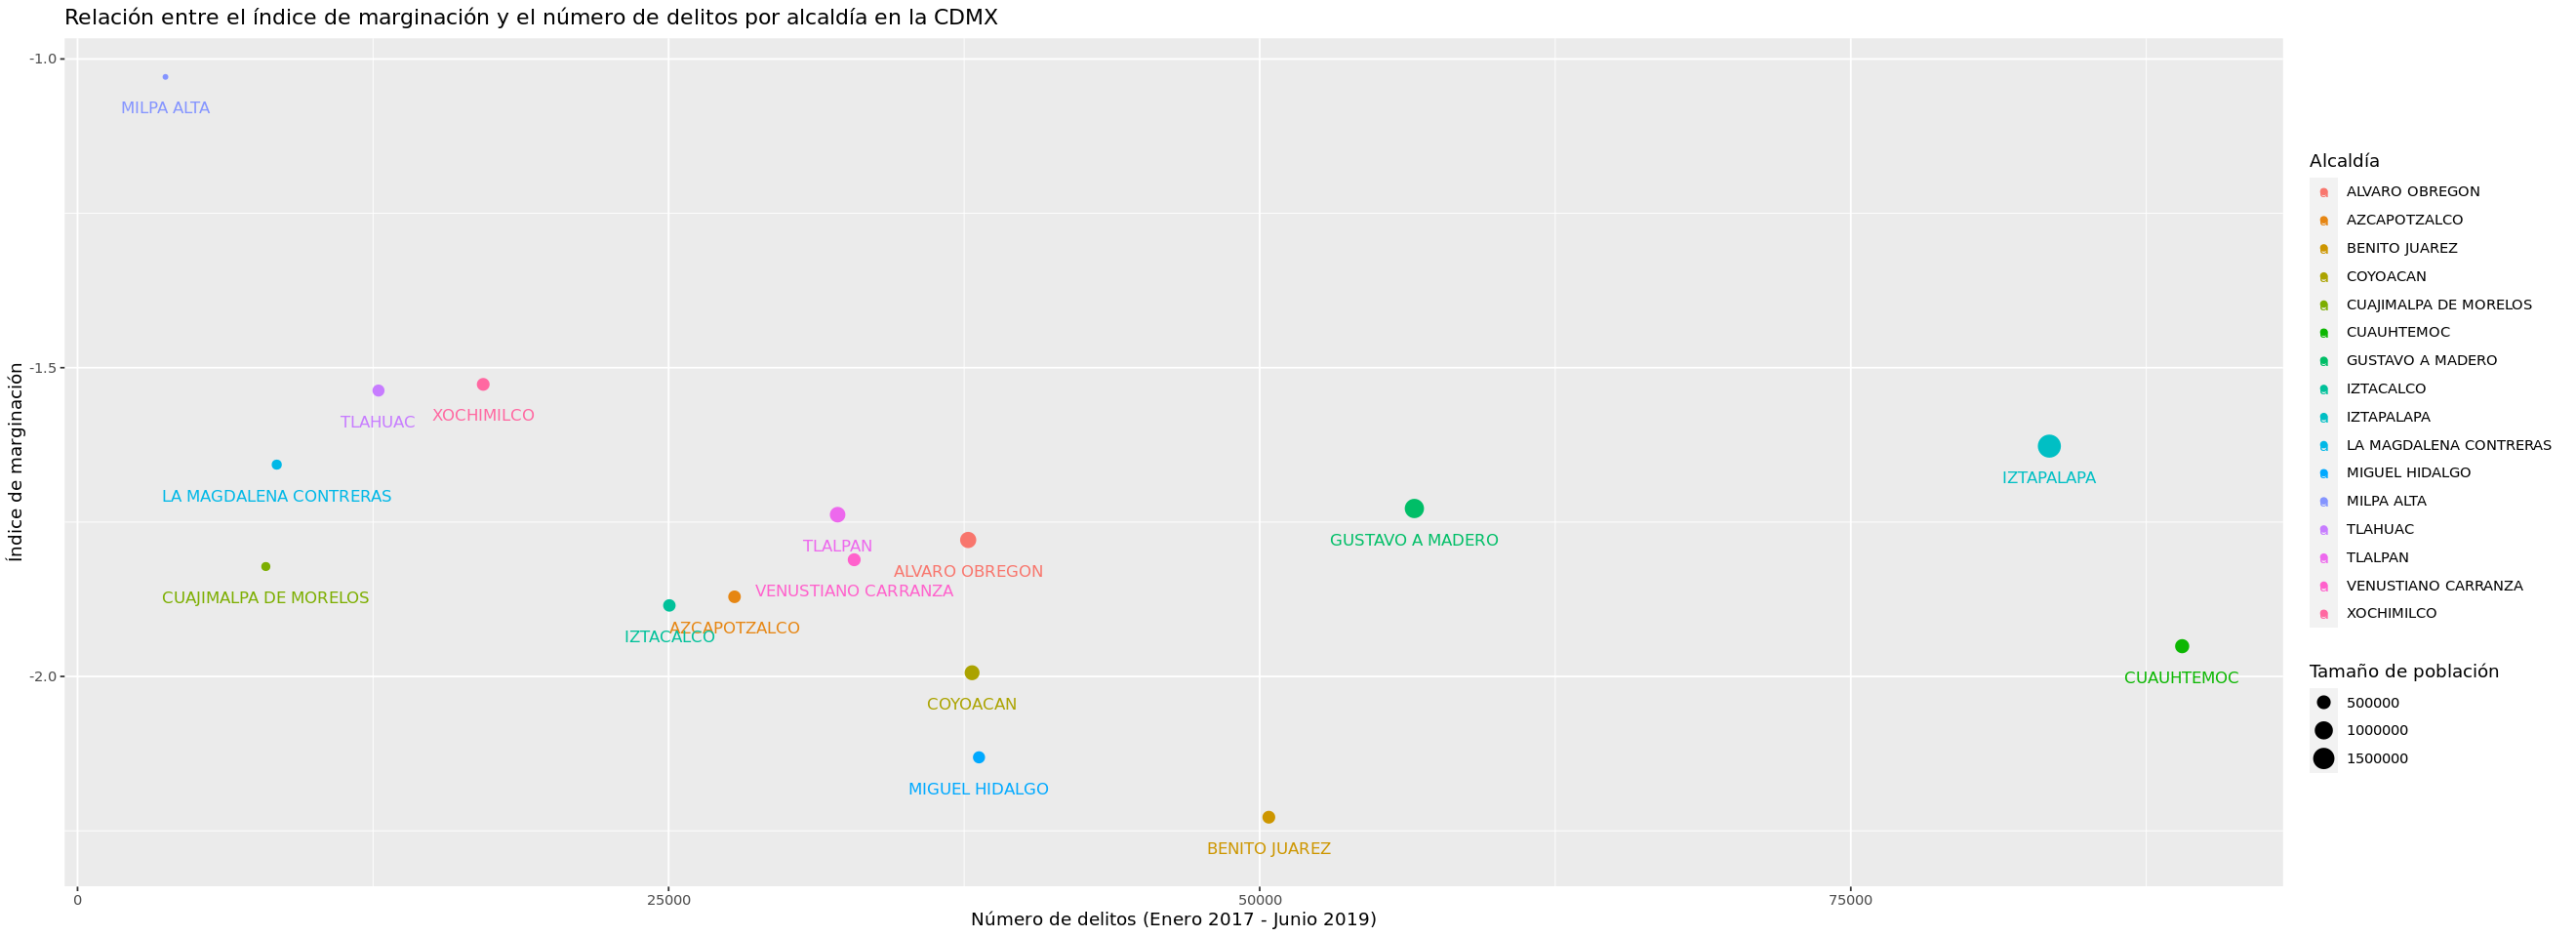

In [472]:
denuncias %>%
    ggplot(aes(x = Delitos, y = IM, color = Alcaldía, size = Población, label = Alcaldía)) +
    geom_point() +
    geom_text(aes(y = IM-0.05, label = Alcaldía), size = 3.5) +
    labs(x = 'Número de delitos (Enero 2017 - Junio 2019)',
         y = 'Índice de marginación',
         title = 'Relación entre el índice de marginación y el número de delitos por alcaldía en la CDMX',
         size = 'Tamaño de población')

Cómo lo vimos en la matriz de correlación, el tamaña de la población y el número de delitos están asociados linealmente, mientras que la asociación entre el índice de marginación y el número de delitos no tiene una asociación tan fuerte.

# Número de denuncias por mes y año (2017 - 2019)

In [465]:
gp1 <- delitos %>%
    ggplot()

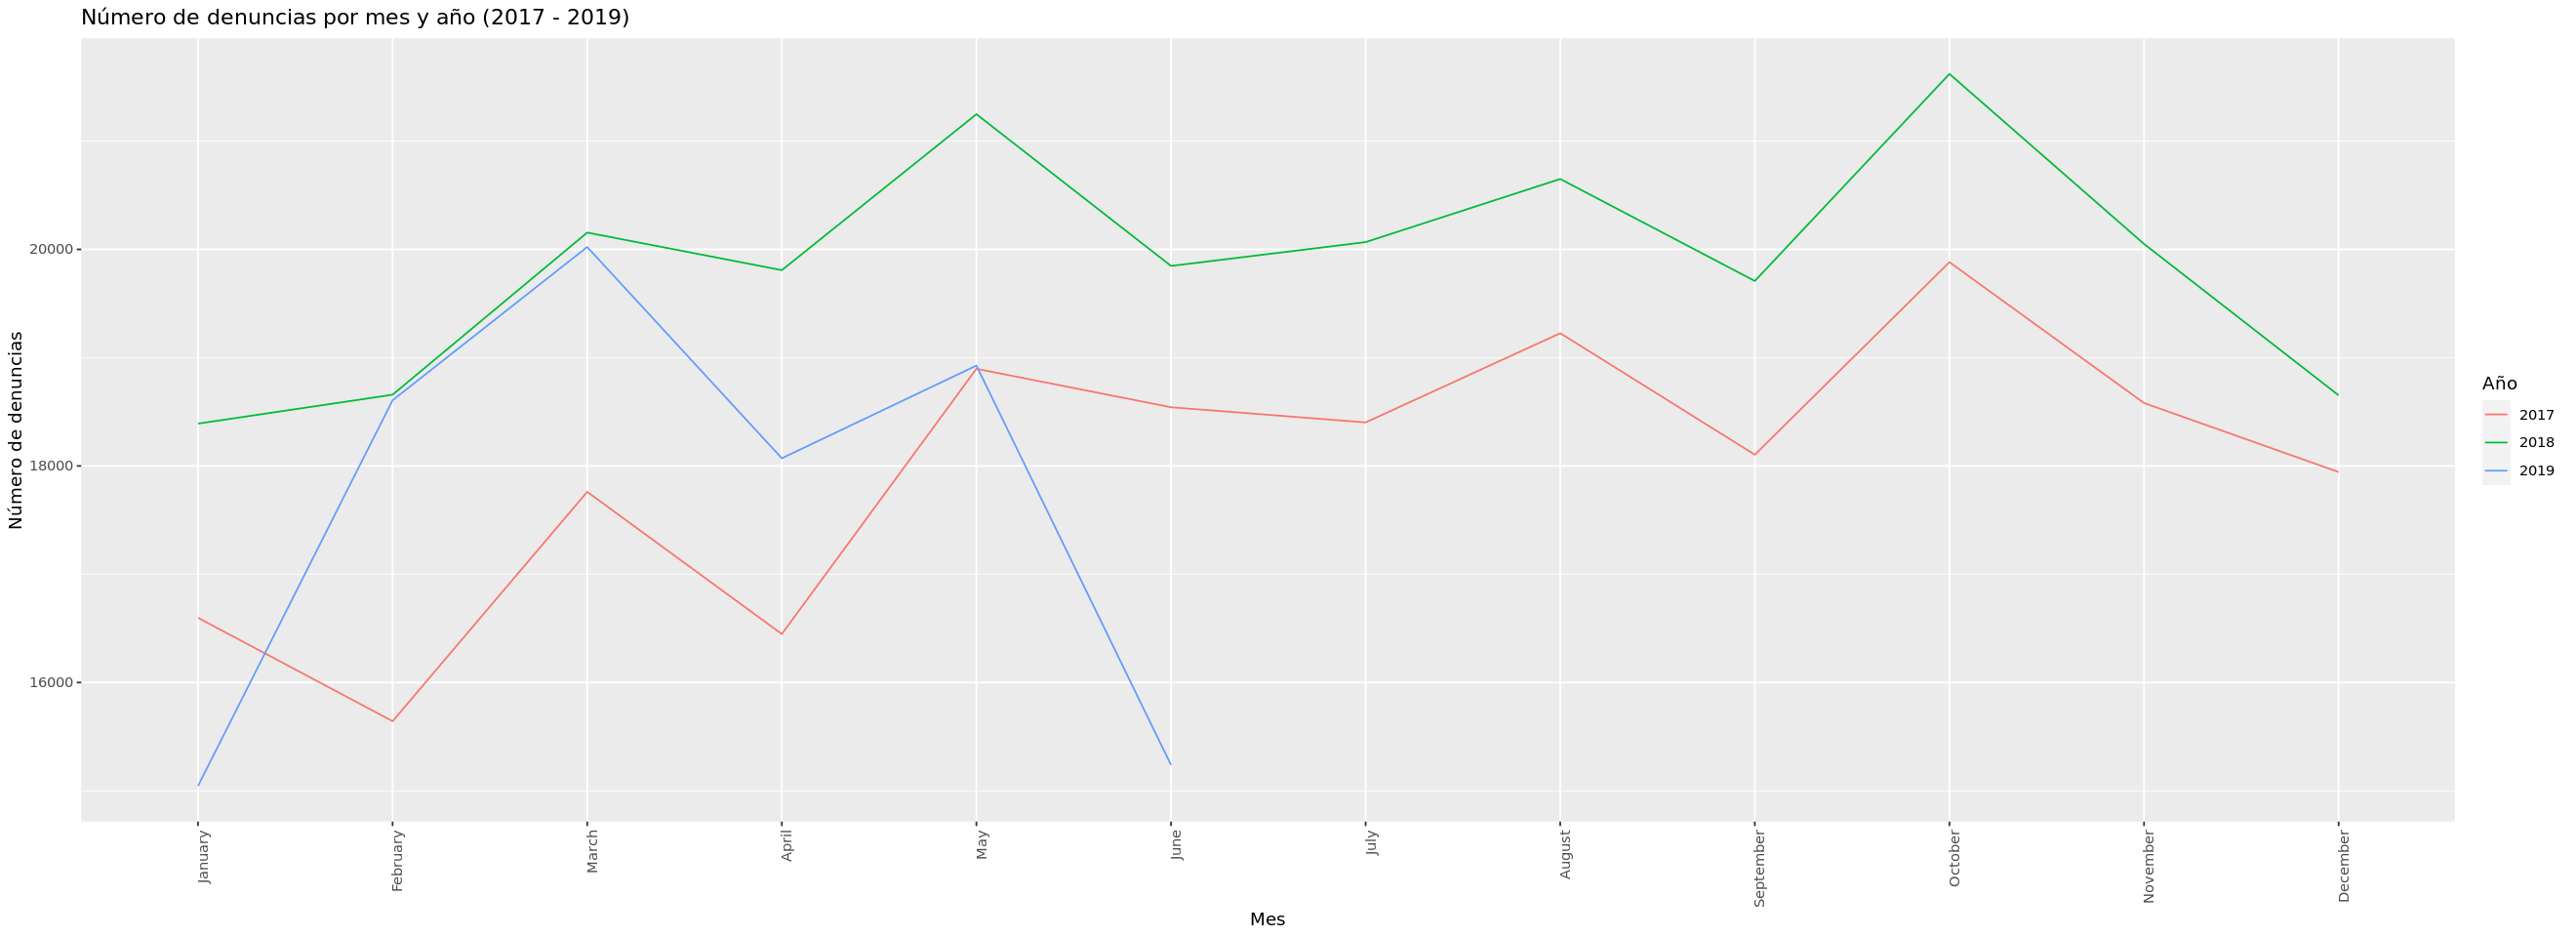

In [504]:
gp1 +
    geom_line(aes(x = mes, group = año, color = año), stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    labs(x = 'Mes',
         y = 'Número de denuncias',
         title = 'Número de denuncias por mes y año (2017 - 2019)',
         color = 'Año')

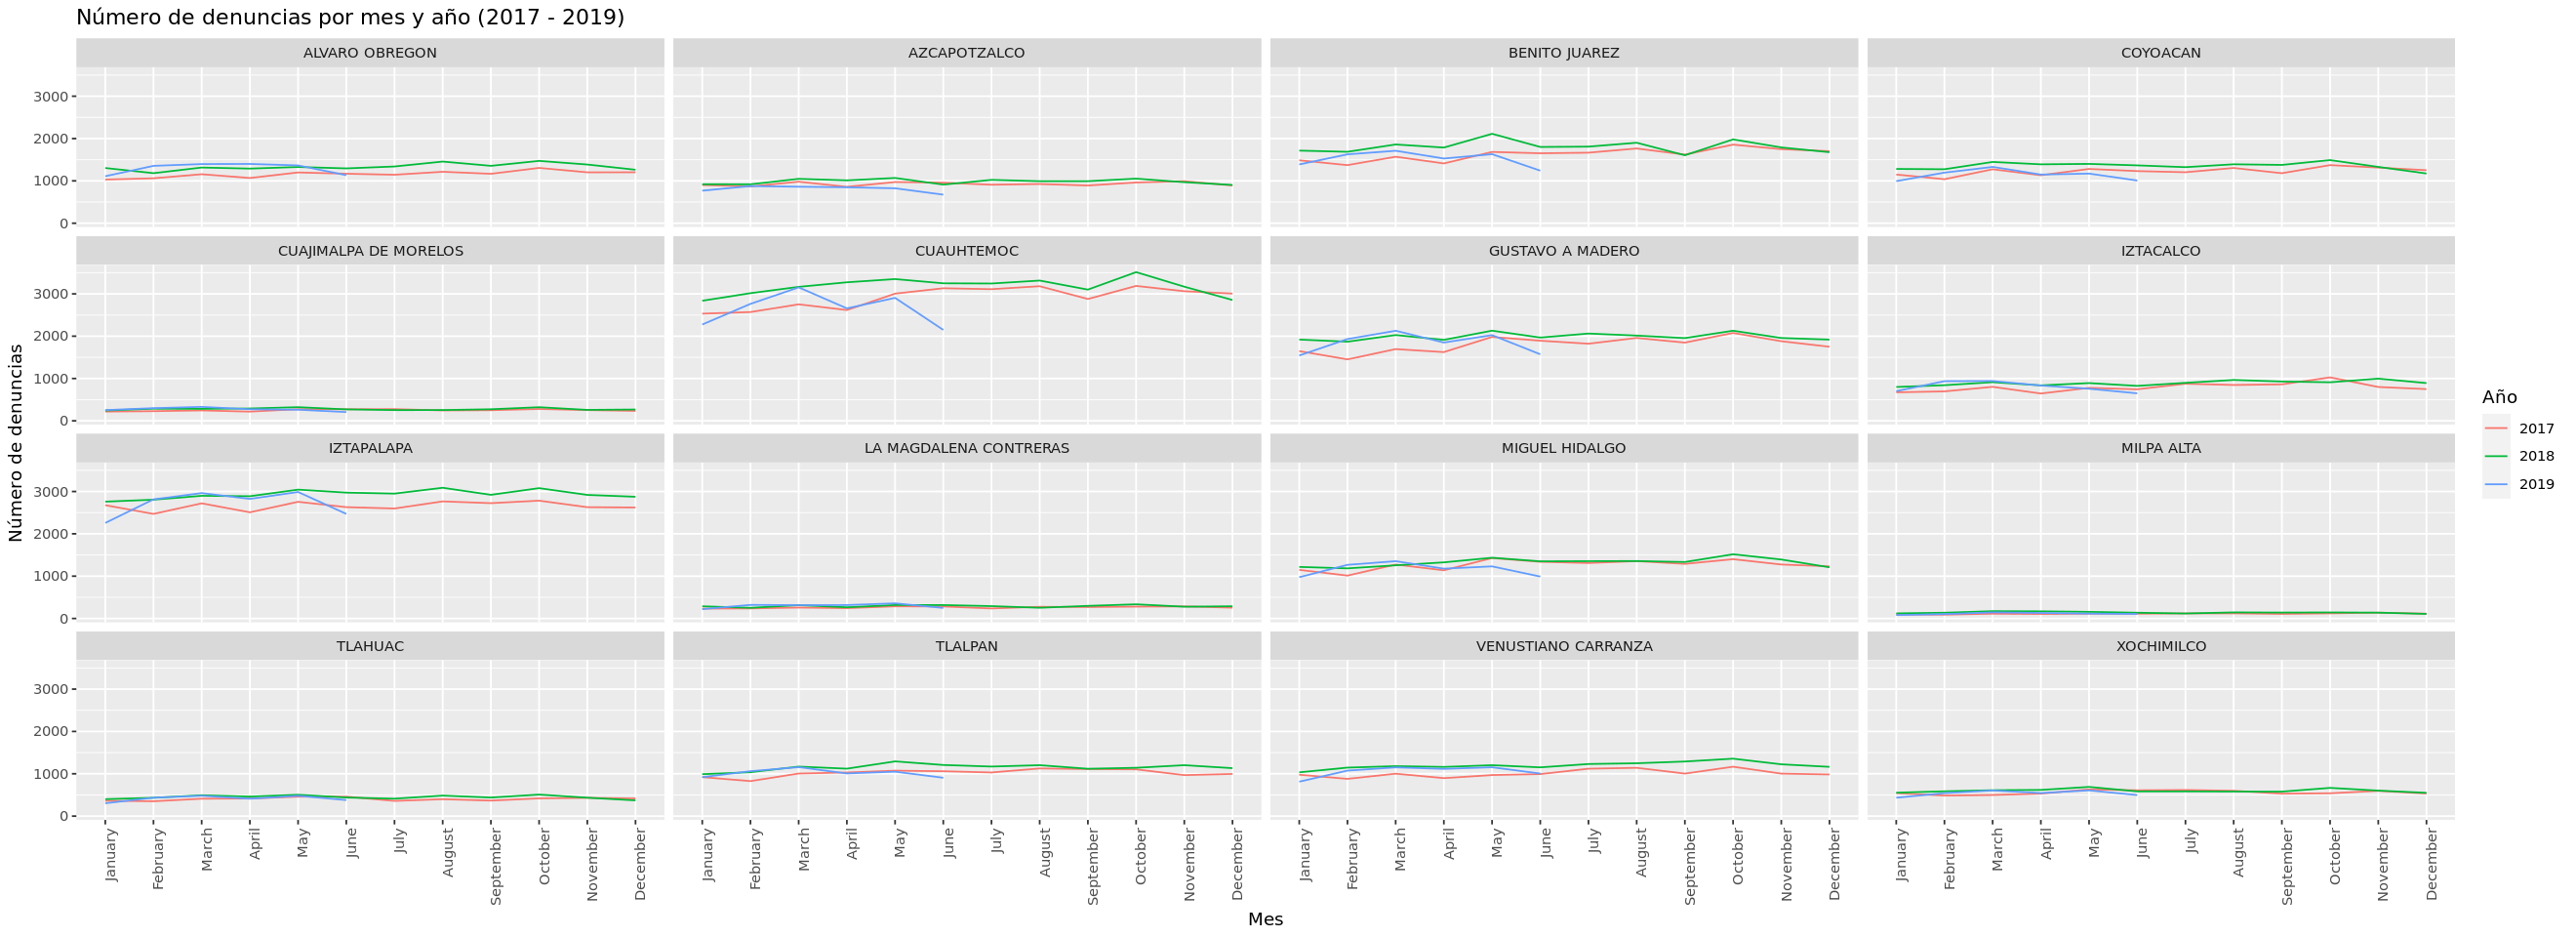

In [508]:
gp1 +
    geom_line(aes(x = mes, group = año, color = año),stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_wrap(vars(alcaldia_hechos)) +
    labs(x = 'Mes',
         y = 'Número de denuncias',
         title = 'Número de denuncias por mes y año (2017 - 2019)',
         color = 'Año')

# Número de denuncias por mes, año y Alcaldía (2017 - 2019)

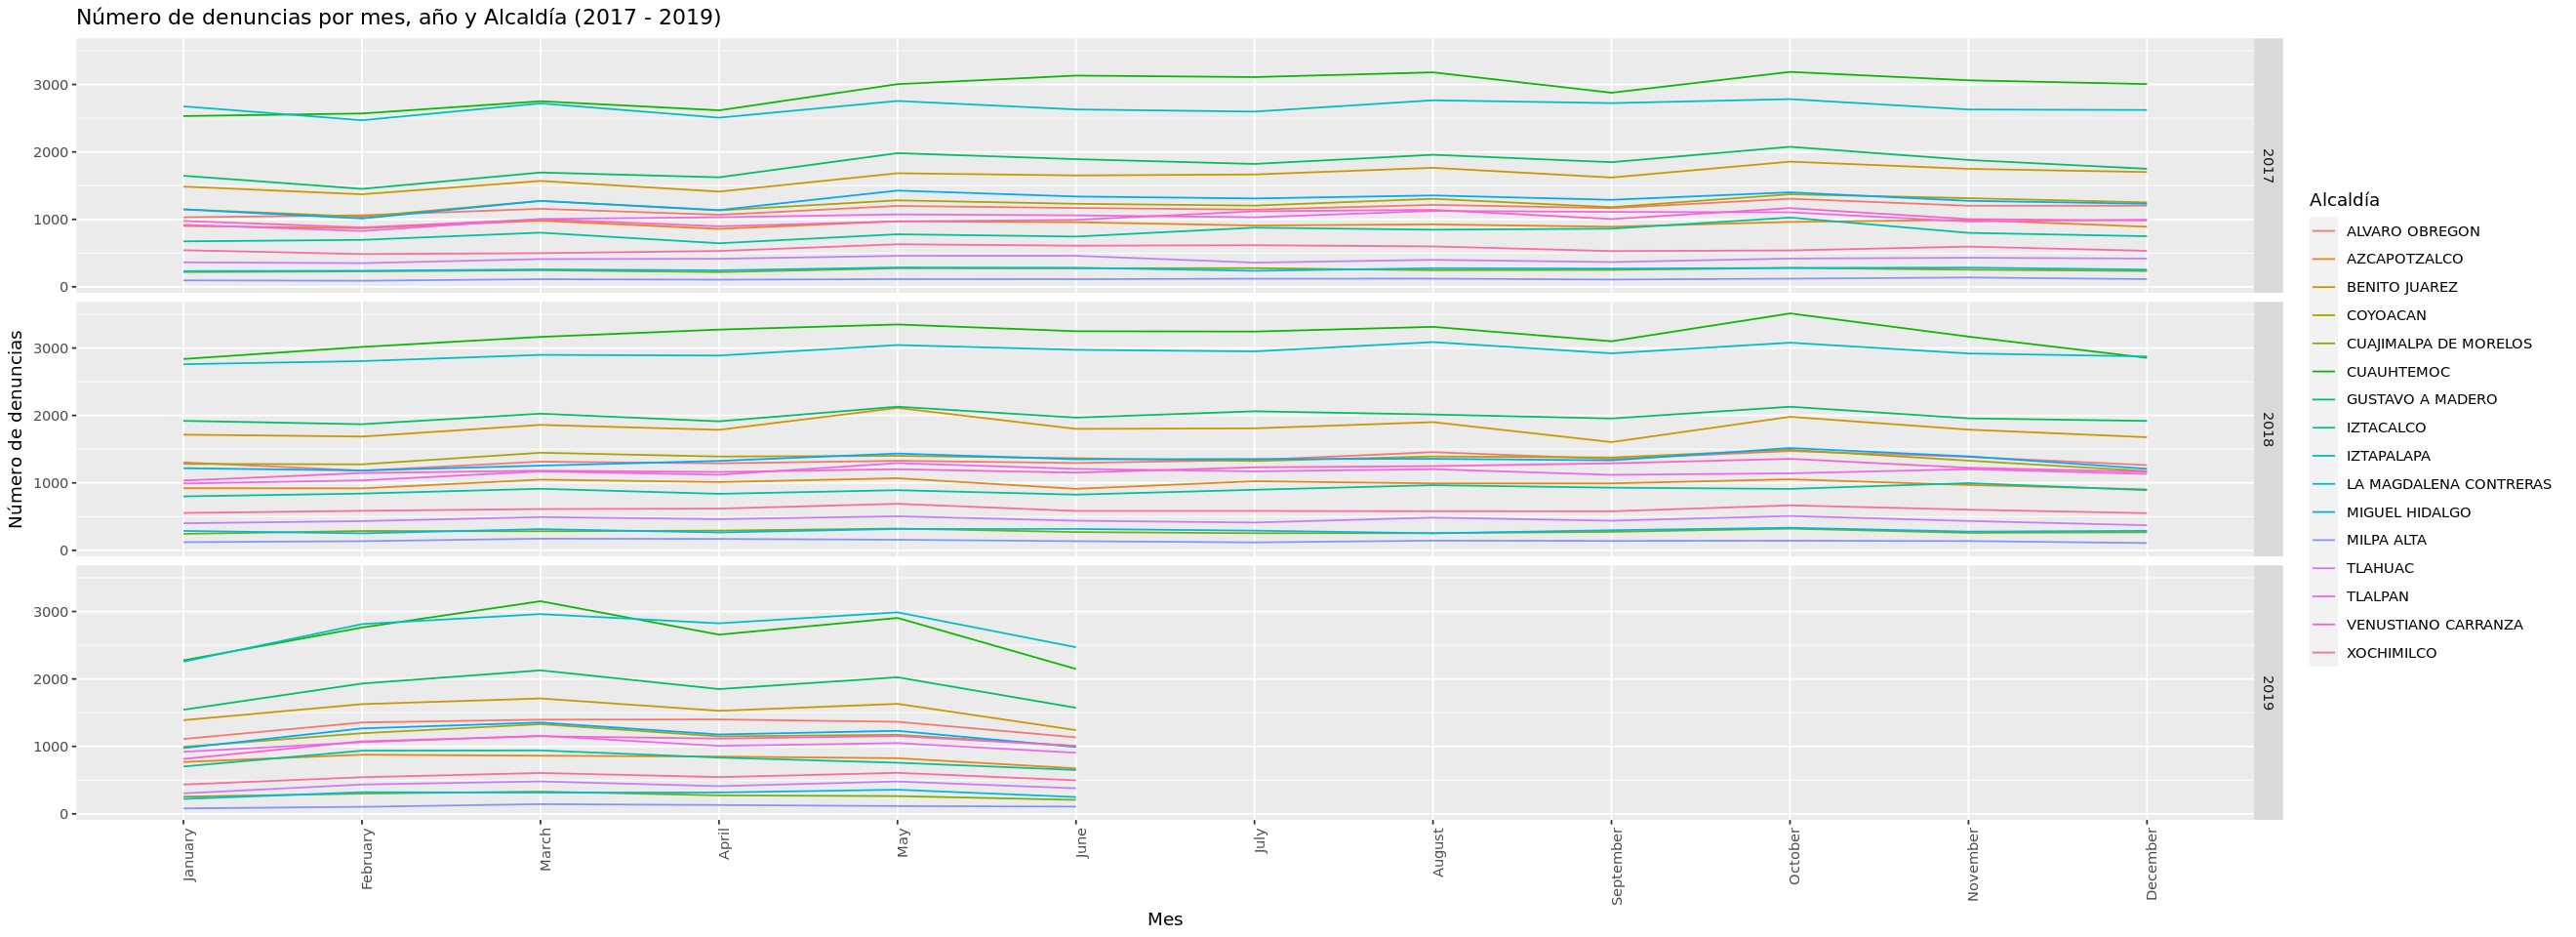

In [482]:
gp1 +
    geom_line(aes(x = mes, group = alcaldia_hechos, color = alcaldia_hechos), stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_grid(rows = vars(año)) +
    labs(x = 'Mes',
         y = 'Número de denuncias',
         title = 'Número de denuncias por mes, año y Alcaldía (2017 - 2019)',
         color = 'Alcaldía')

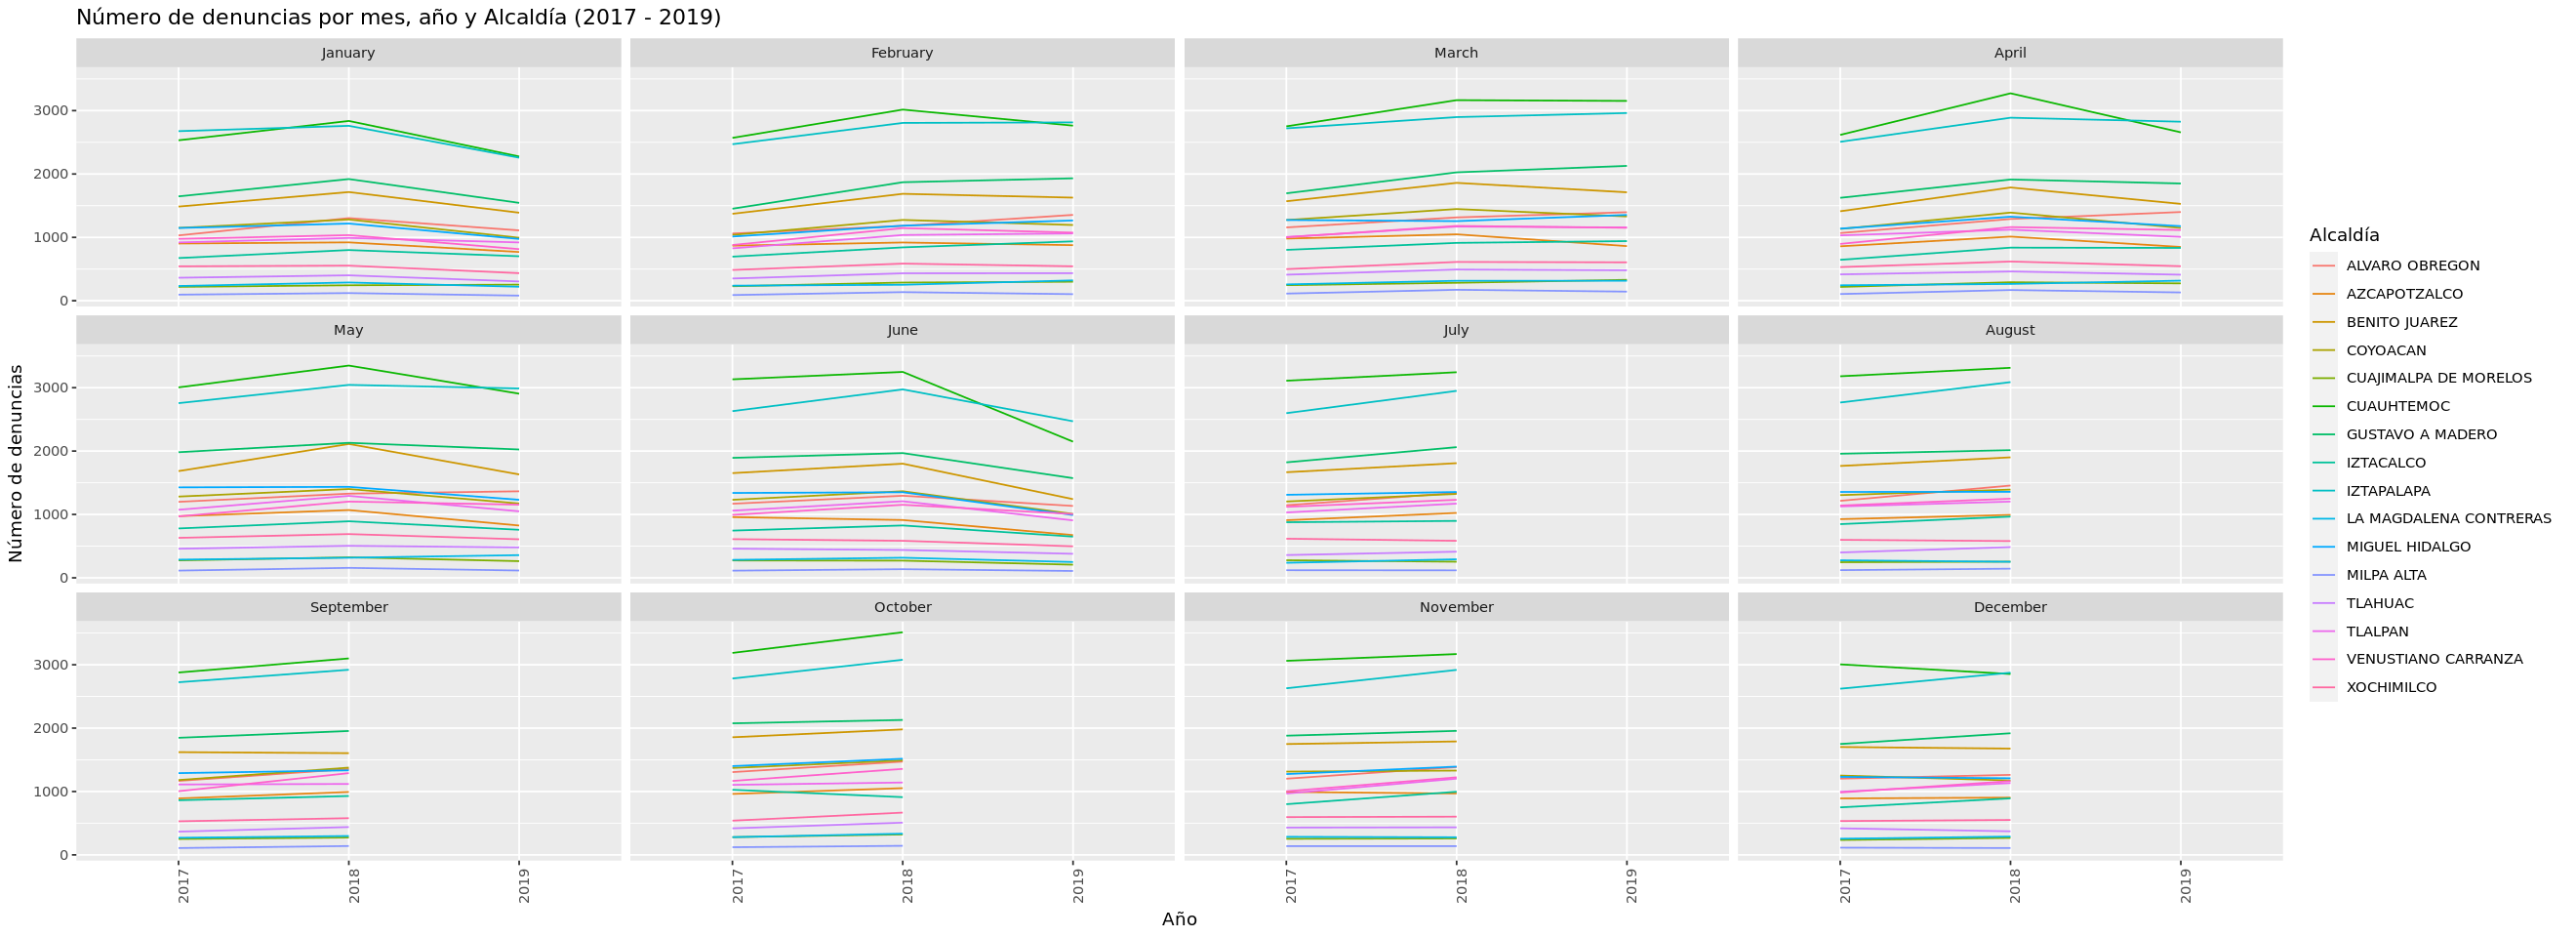

In [481]:
gp1 +
    geom_line(aes(x = año, group = alcaldia_hechos, color = alcaldia_hechos),stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_wrap(vars(mes)) +
    labs(x = 'Año',
         y = 'Número de denuncias',
         title = 'Número de denuncias por mes, año y Alcaldía (2017 - 2019)',
         color = 'Alcaldía')

# Número de denuncias por mes, año y tipo de delito (2017 - 2019)

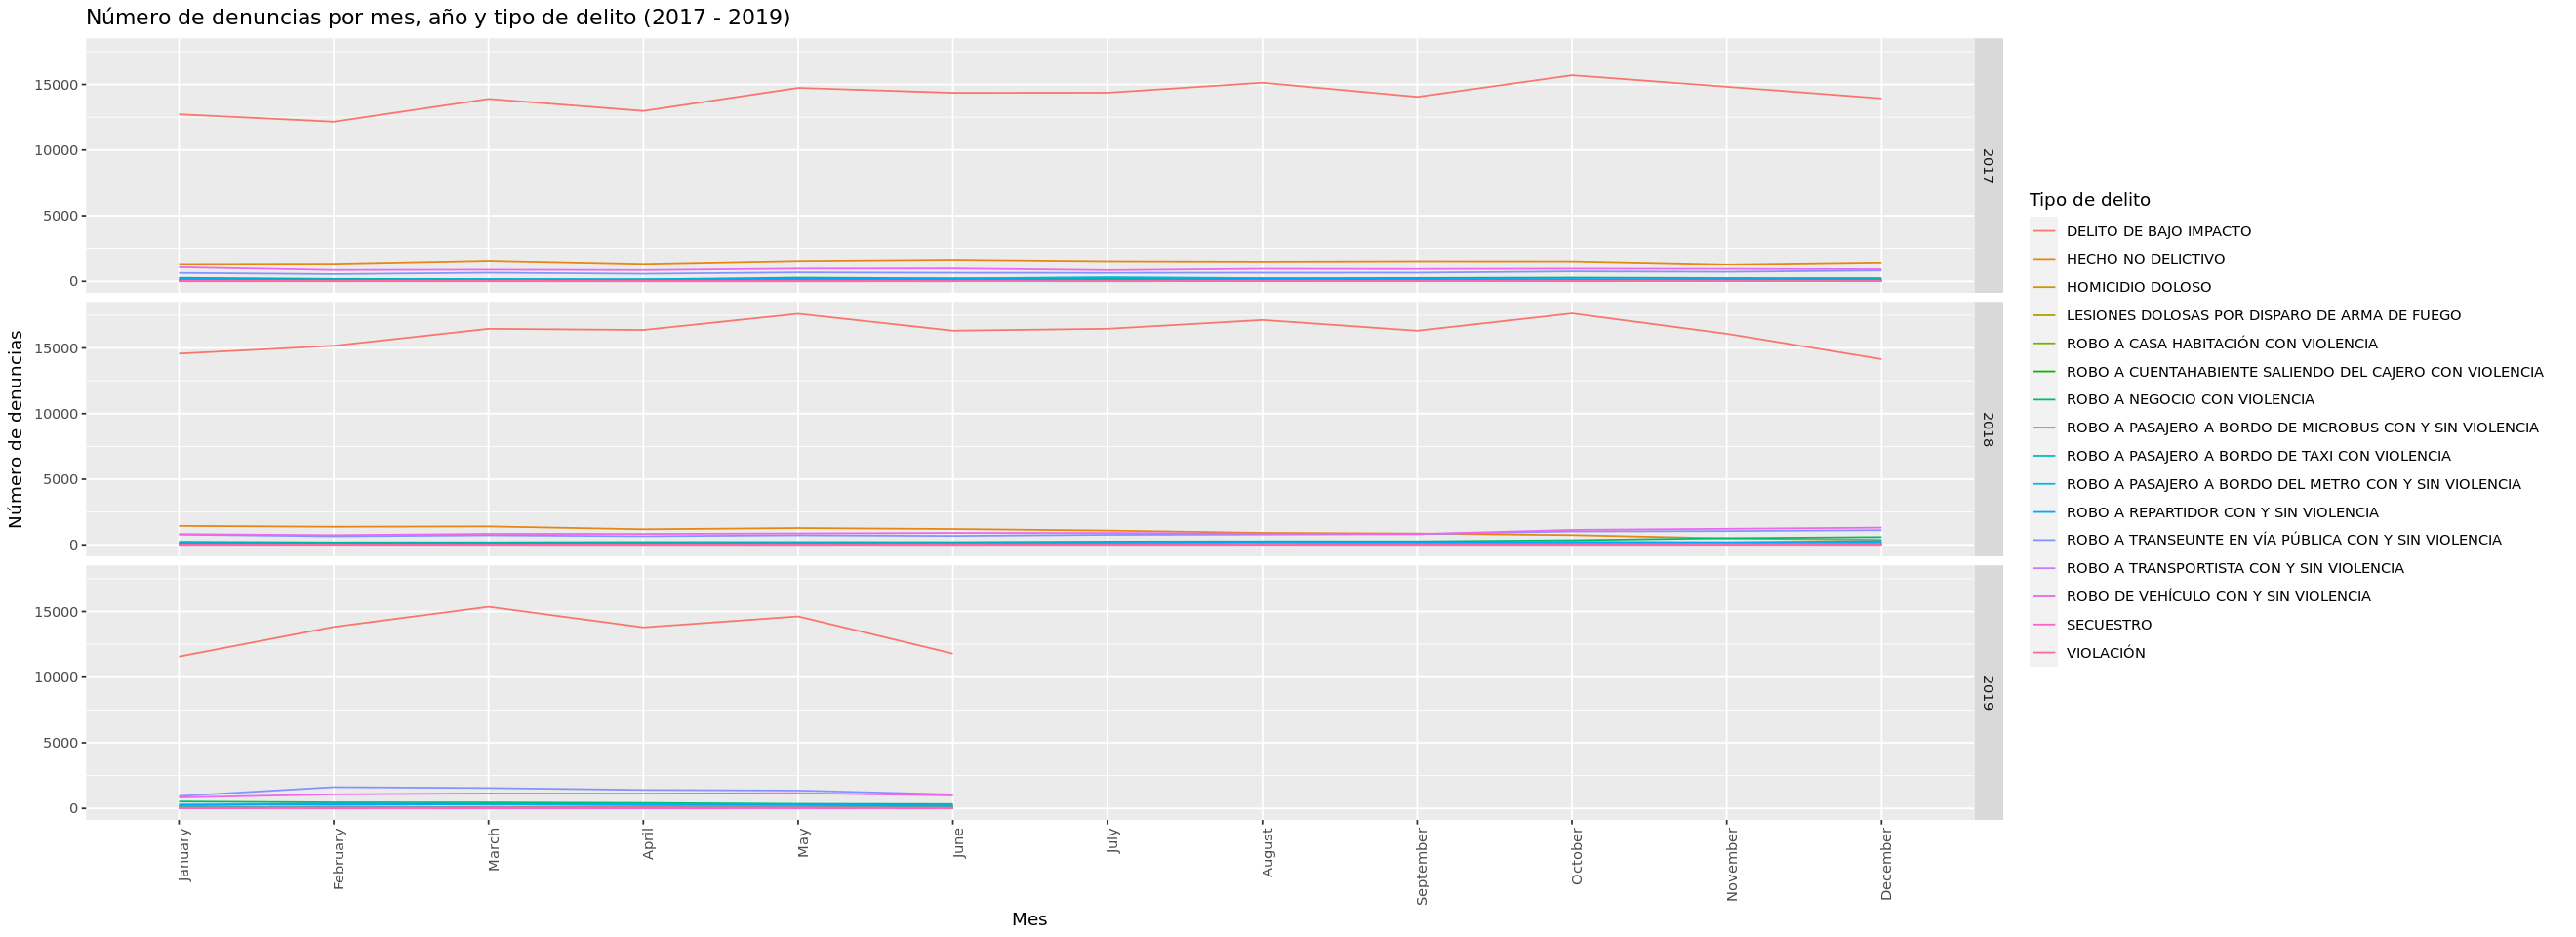

In [480]:
gp1 +
    geom_line(aes(x = mes, group = categoria_delito, color = categoria_delito),stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_grid(rows = vars(año)) +
    labs(x = 'Mes',
         y = 'Número de denuncias',
         title = 'Número de denuncias por mes, año y tipo de delito (2017 - 2019)',
         color = 'Tipo de delito')

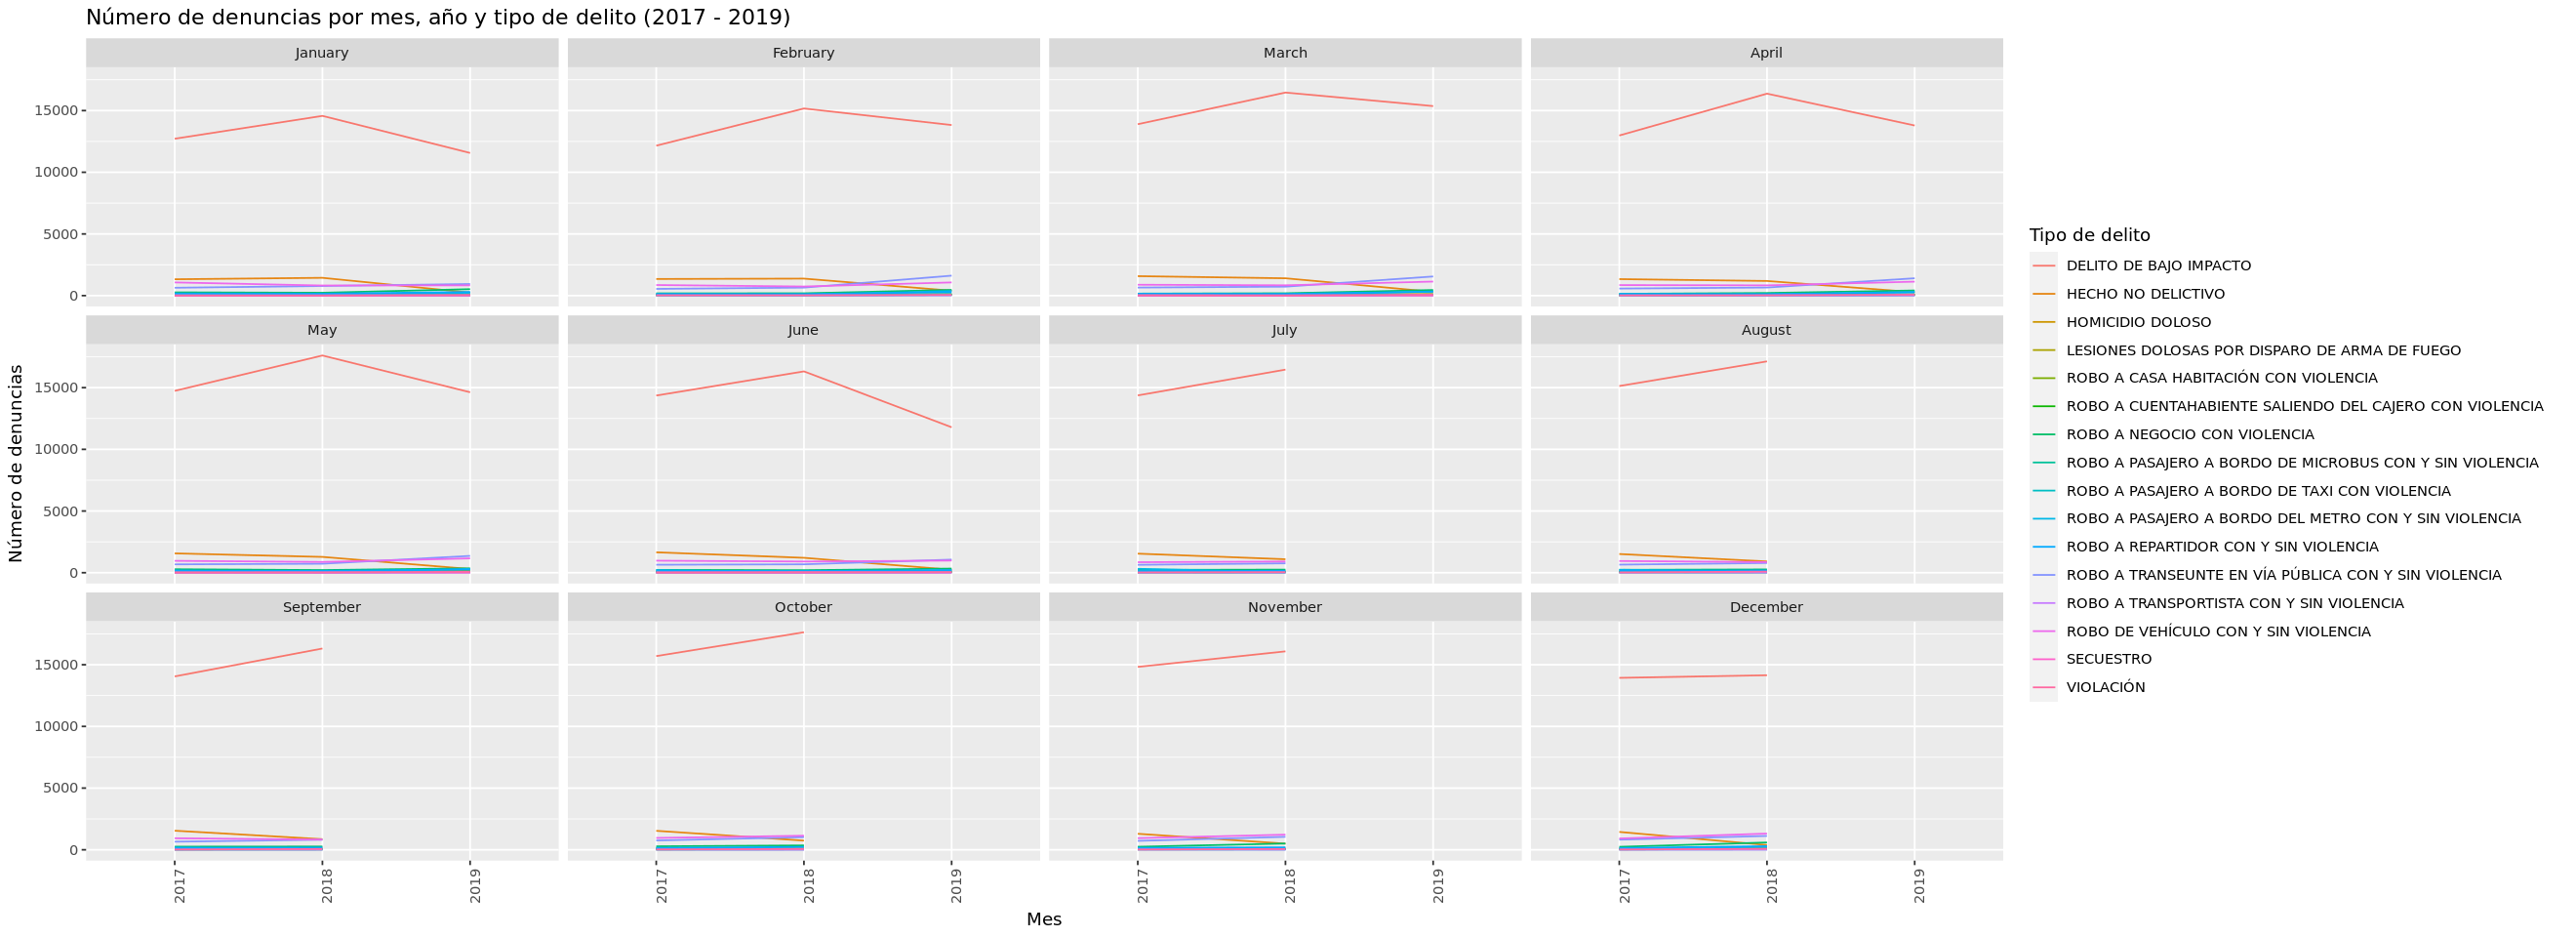

In [483]:
gp1 +
    geom_line(aes(x = año, group = categoria_delito, color = categoria_delito),stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_wrap(vars(mes)) +
    labs(x = 'Mes',
         y = 'Número de denuncias',
         title = 'Número de denuncias por mes, año y tipo de delito (2017 - 2019)',
         color = 'Tipo de delito')

# Número de denuncias por mes y año (2017 - 2019)

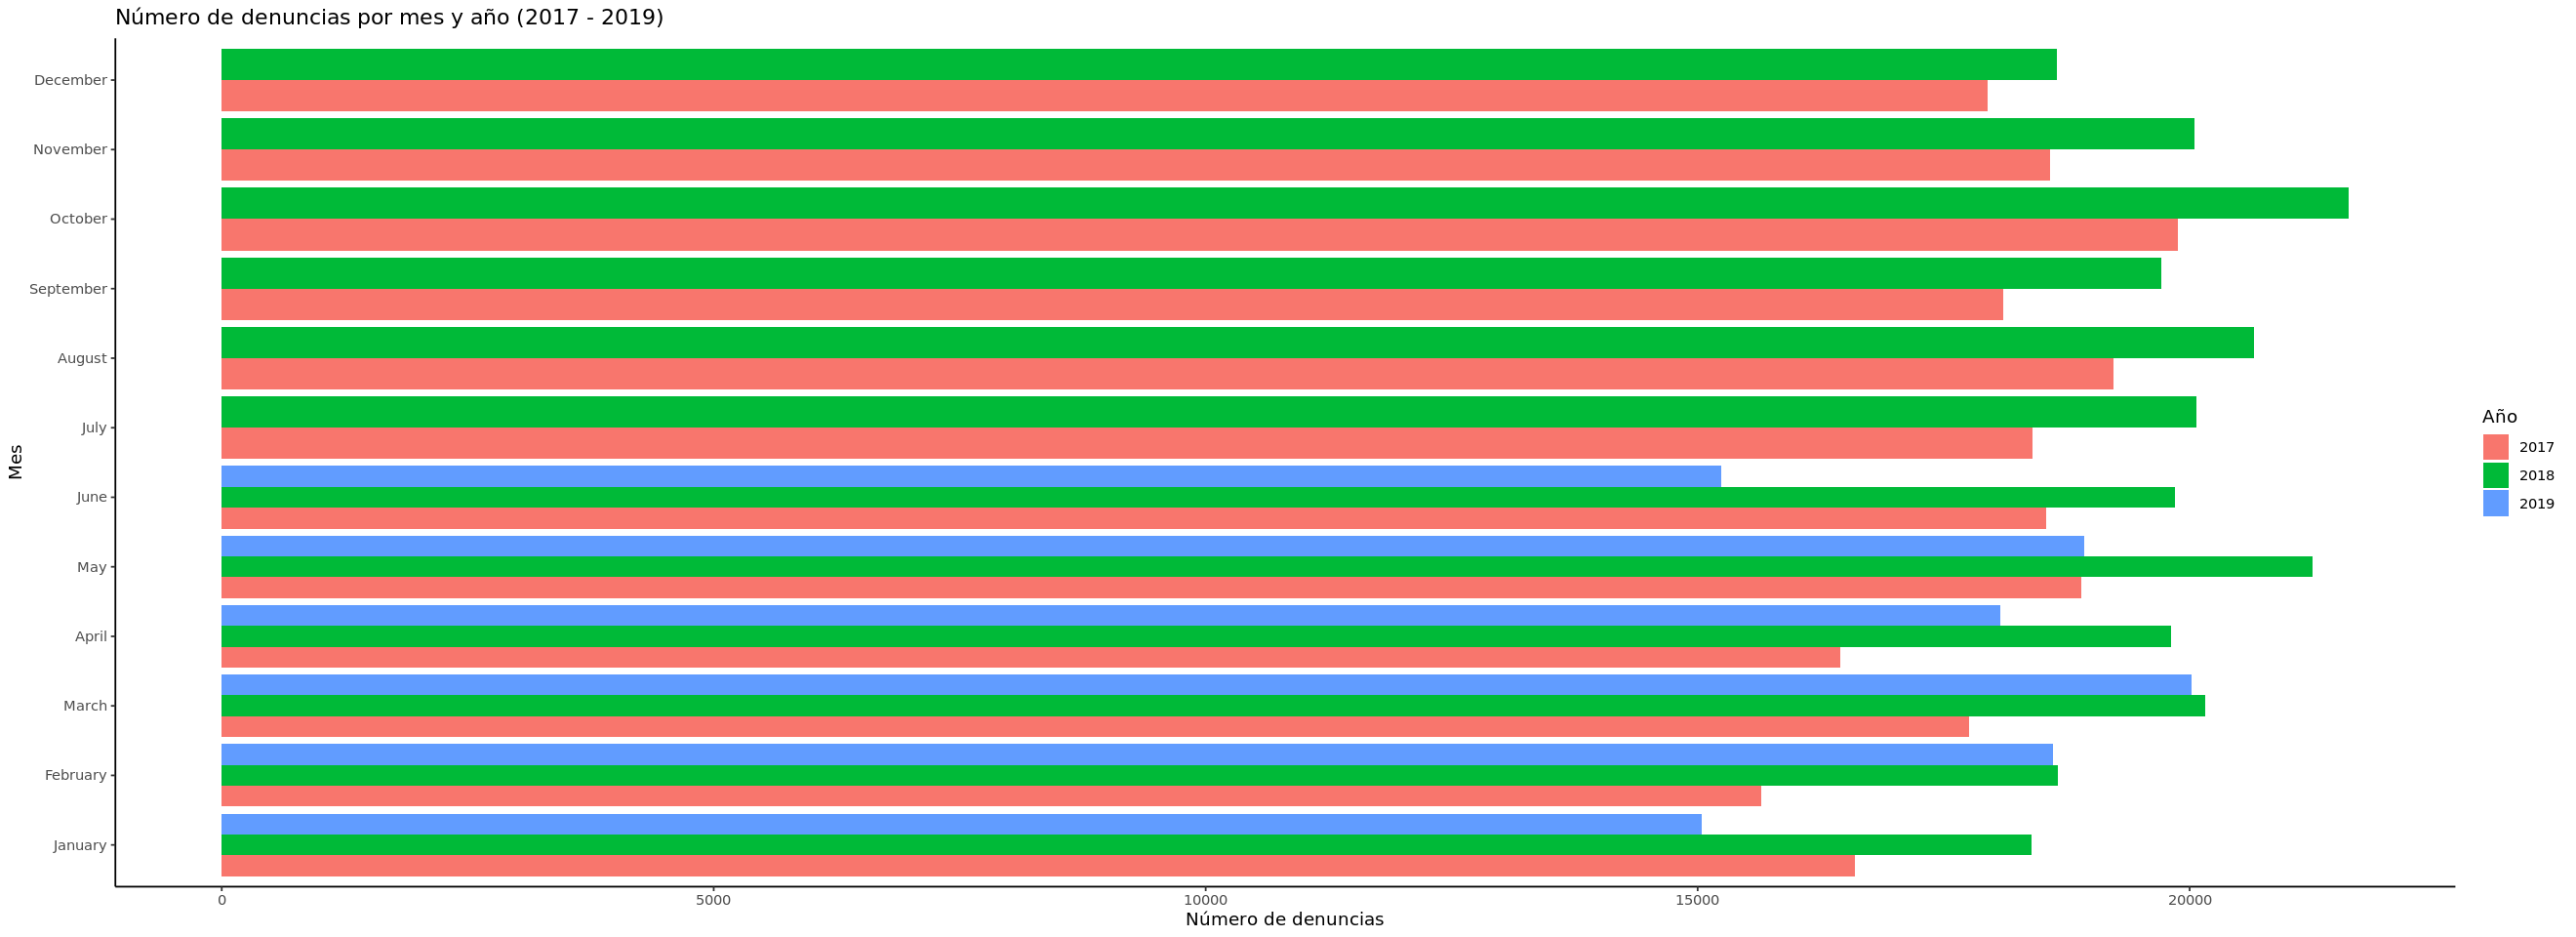

In [513]:
gp1 +
    geom_bar(aes(mes, fill = año), position = 'dodge') +
    coord_flip() +
    theme_classic() +
    labs(x = 'Mes',
         y = 'Número de denuncias',
         title = 'Número de denuncias por mes y año (2017 - 2019)',
         fill = 'Año')

# Número de denuncias por Alcaldía y año (2017 - 2019)

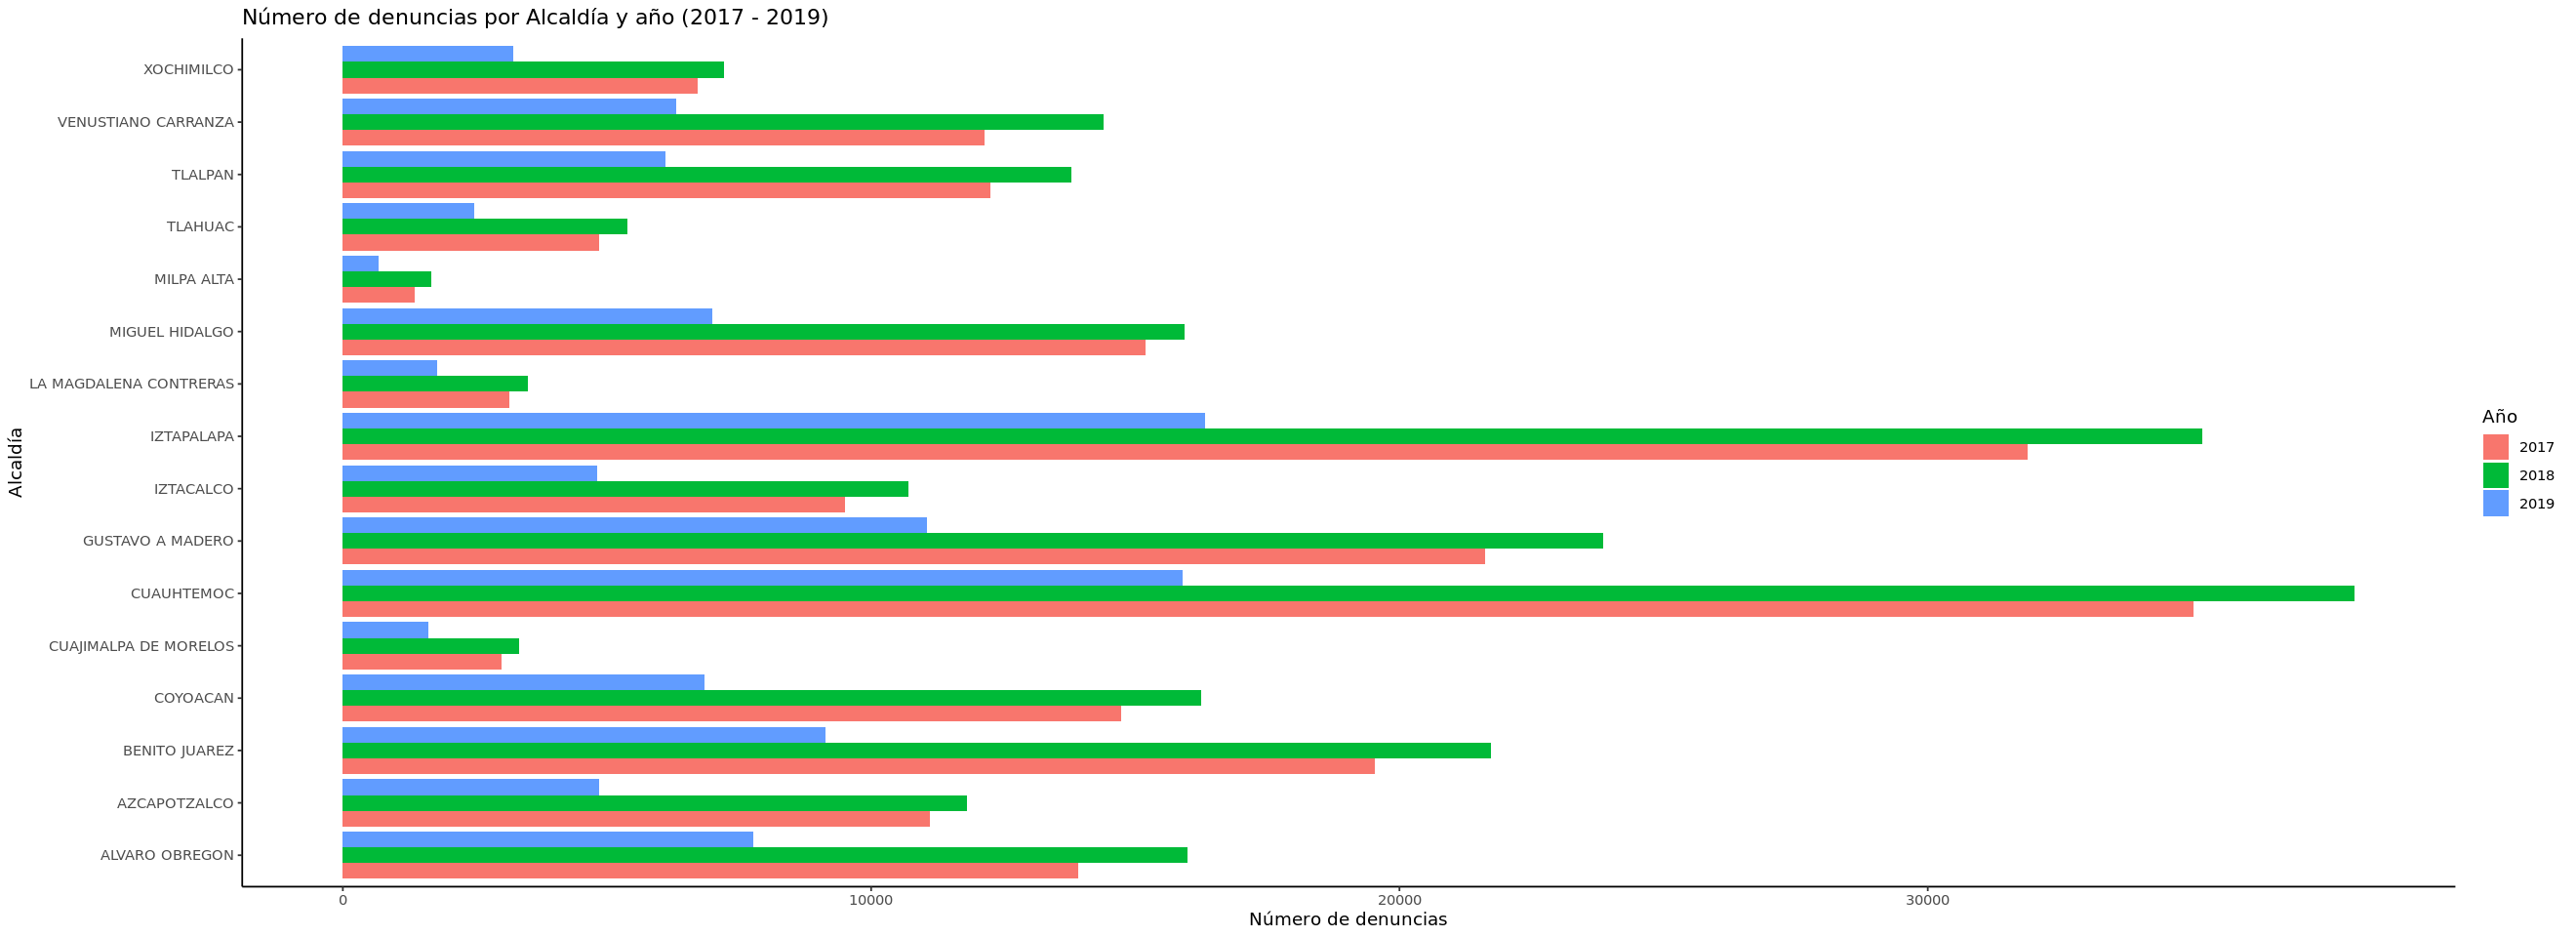

In [514]:
gp1 +
    geom_bar(aes(alcaldia_hechos, fill = año), position = 'dodge') +
    coord_flip() +
    theme_classic() +
    labs(x = 'Alcaldía',
         y = 'Número de denuncias',
         title = 'Número de denuncias por Alcaldía y año (2017 - 2019)',
         fill = 'Año')

# Número de denuncias por tipo de delito y año (2017 - 2019)

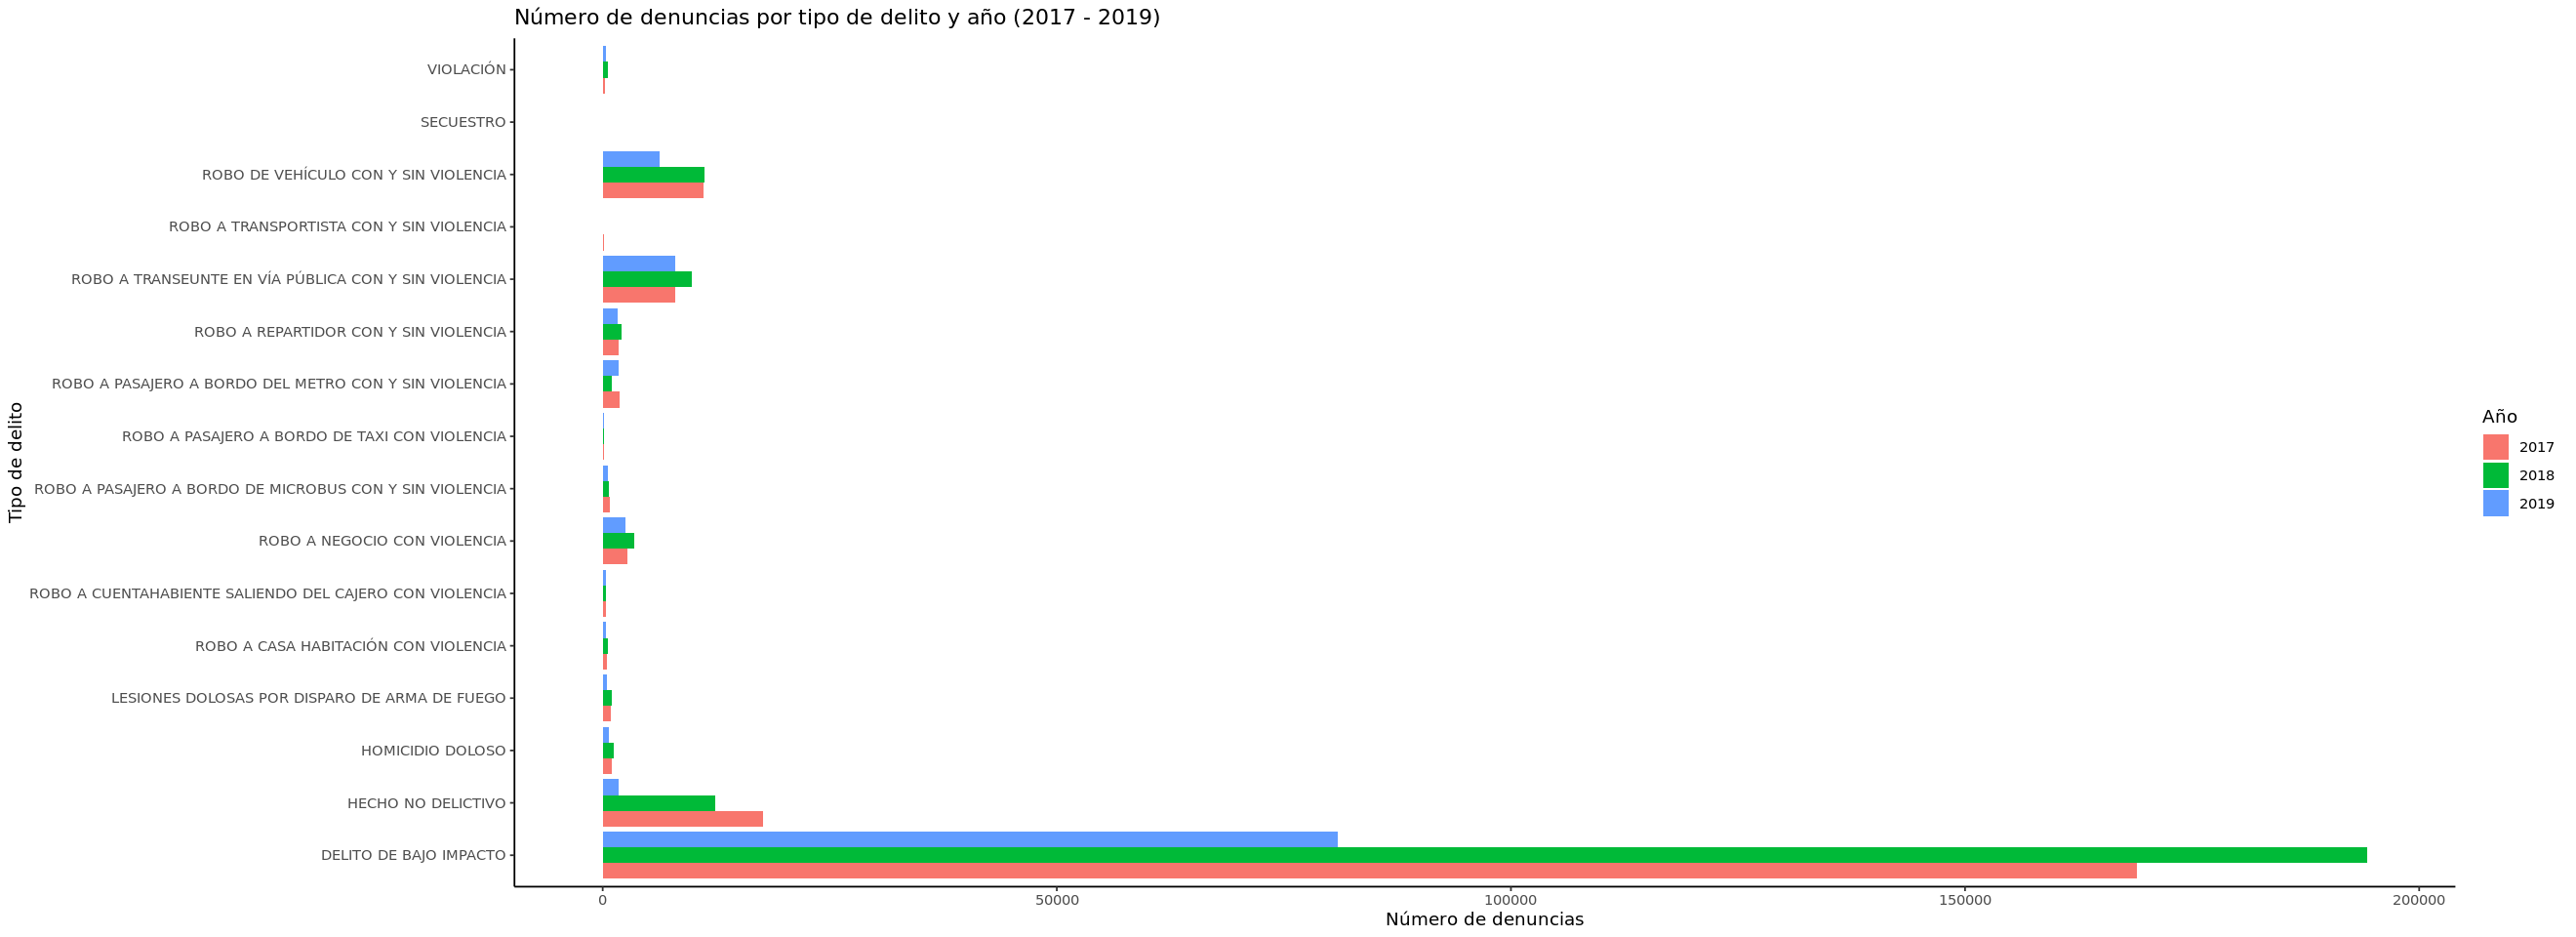

In [515]:
gp1 +
    geom_bar(aes(categoria_delito, fill = año), position = 'dodge') +
    coord_flip() +
    theme_classic() +
    labs(x = 'Tipo de delito',
         y = 'Número de denuncias',
         title = 'Número de denuncias por tipo de delito y año (2017 - 2019)',
         fill = 'Año')

# Número de denuncias de delito de bajo impacto por Alcaldía y año (2017 - 2019)

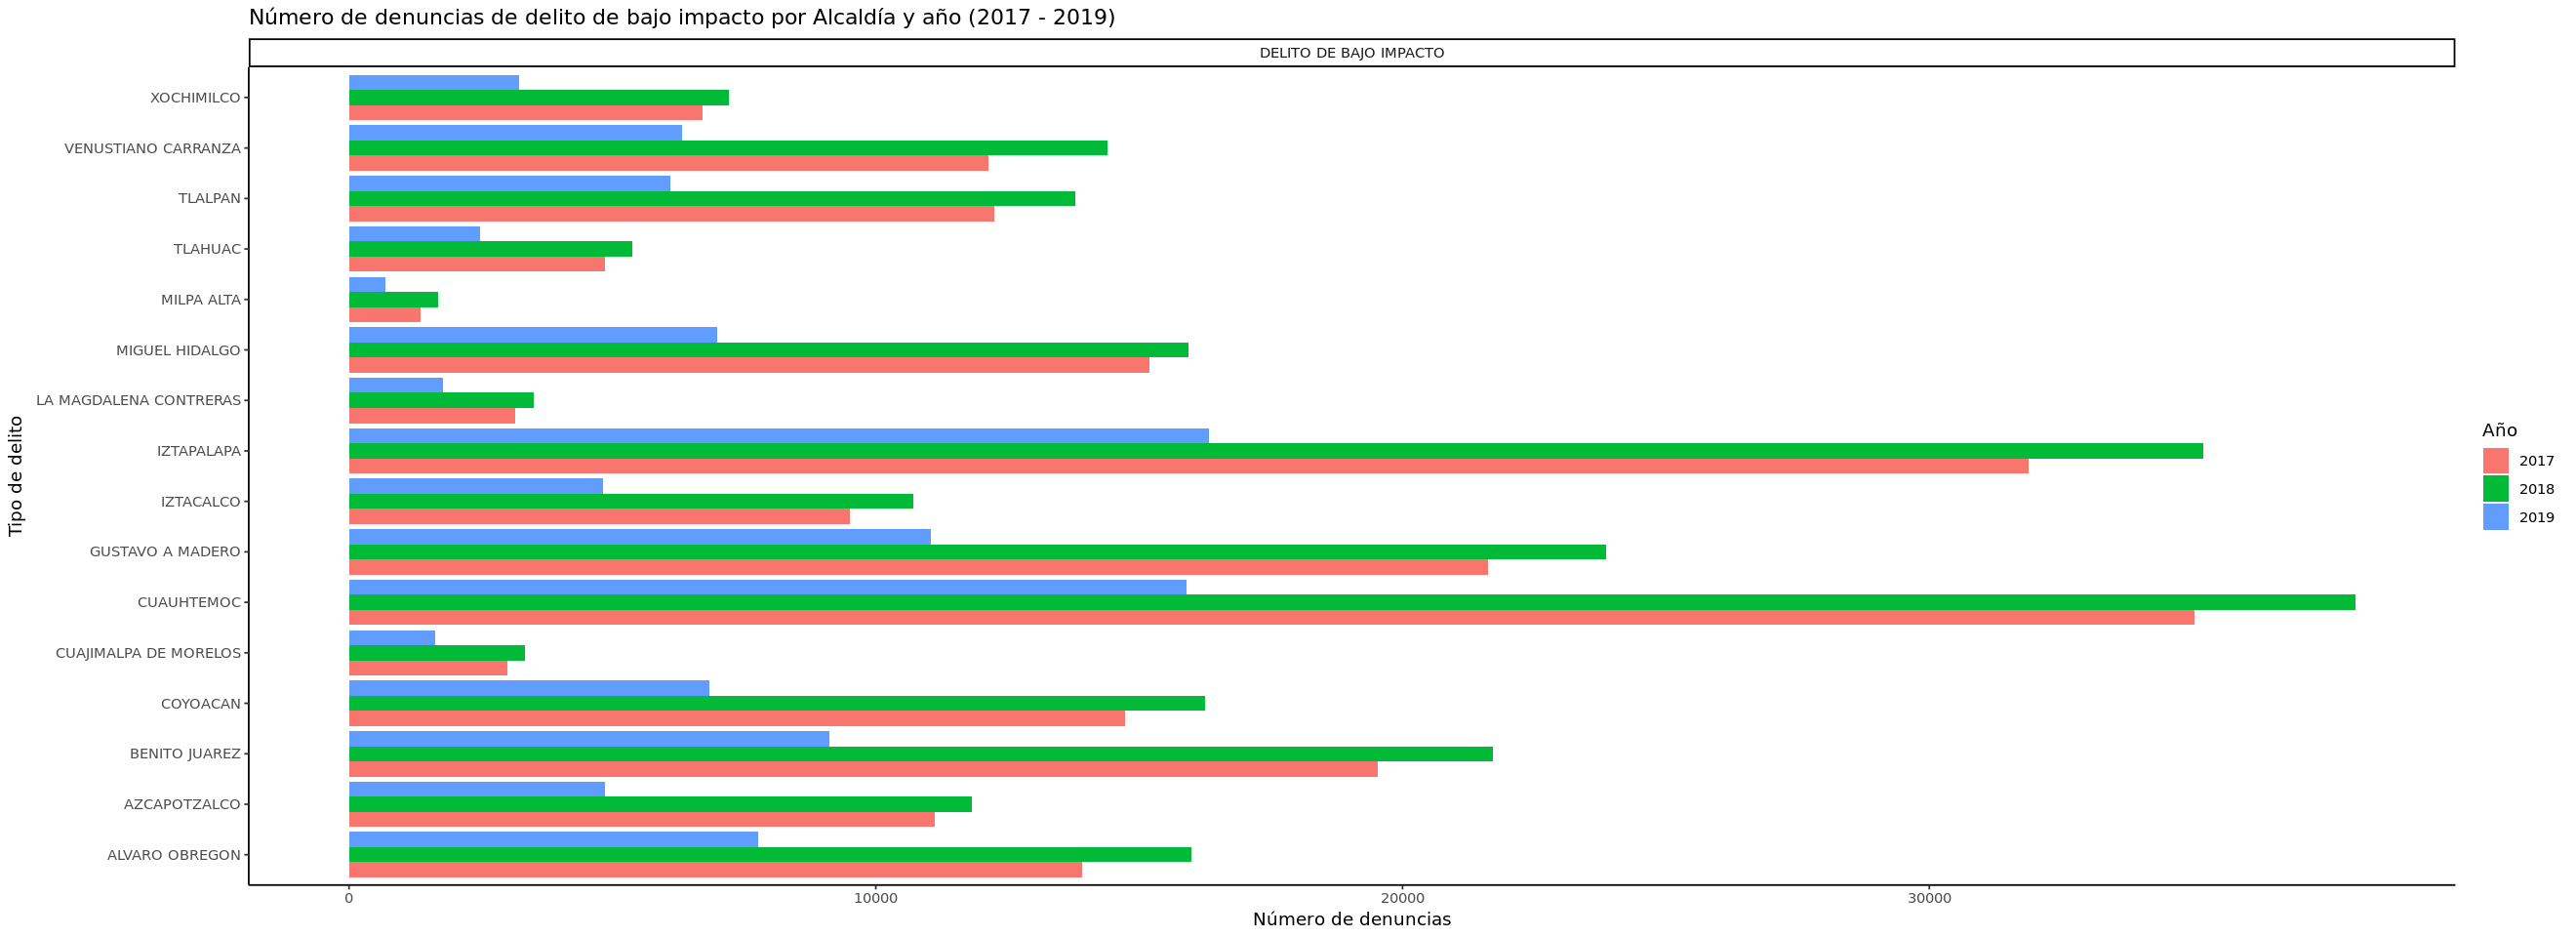

In [516]:
gp1 +
    geom_bar(aes(alcaldia_hechos, fill = año), position = 'dodge') +
    coord_flip() +
    theme_classic() +
    facet_wrap(vars(categoria_delito[16])) +
    labs(x = 'Tipo de delito',
         y = 'Número de denuncias',
         title = 'Número de denuncias de delito de bajo impacto por Alcaldía y año (2017 - 2019)',
         fill = 'Año')

# Número de denuncias de delito de bajo impacto por mes y año (2017 - 2019)

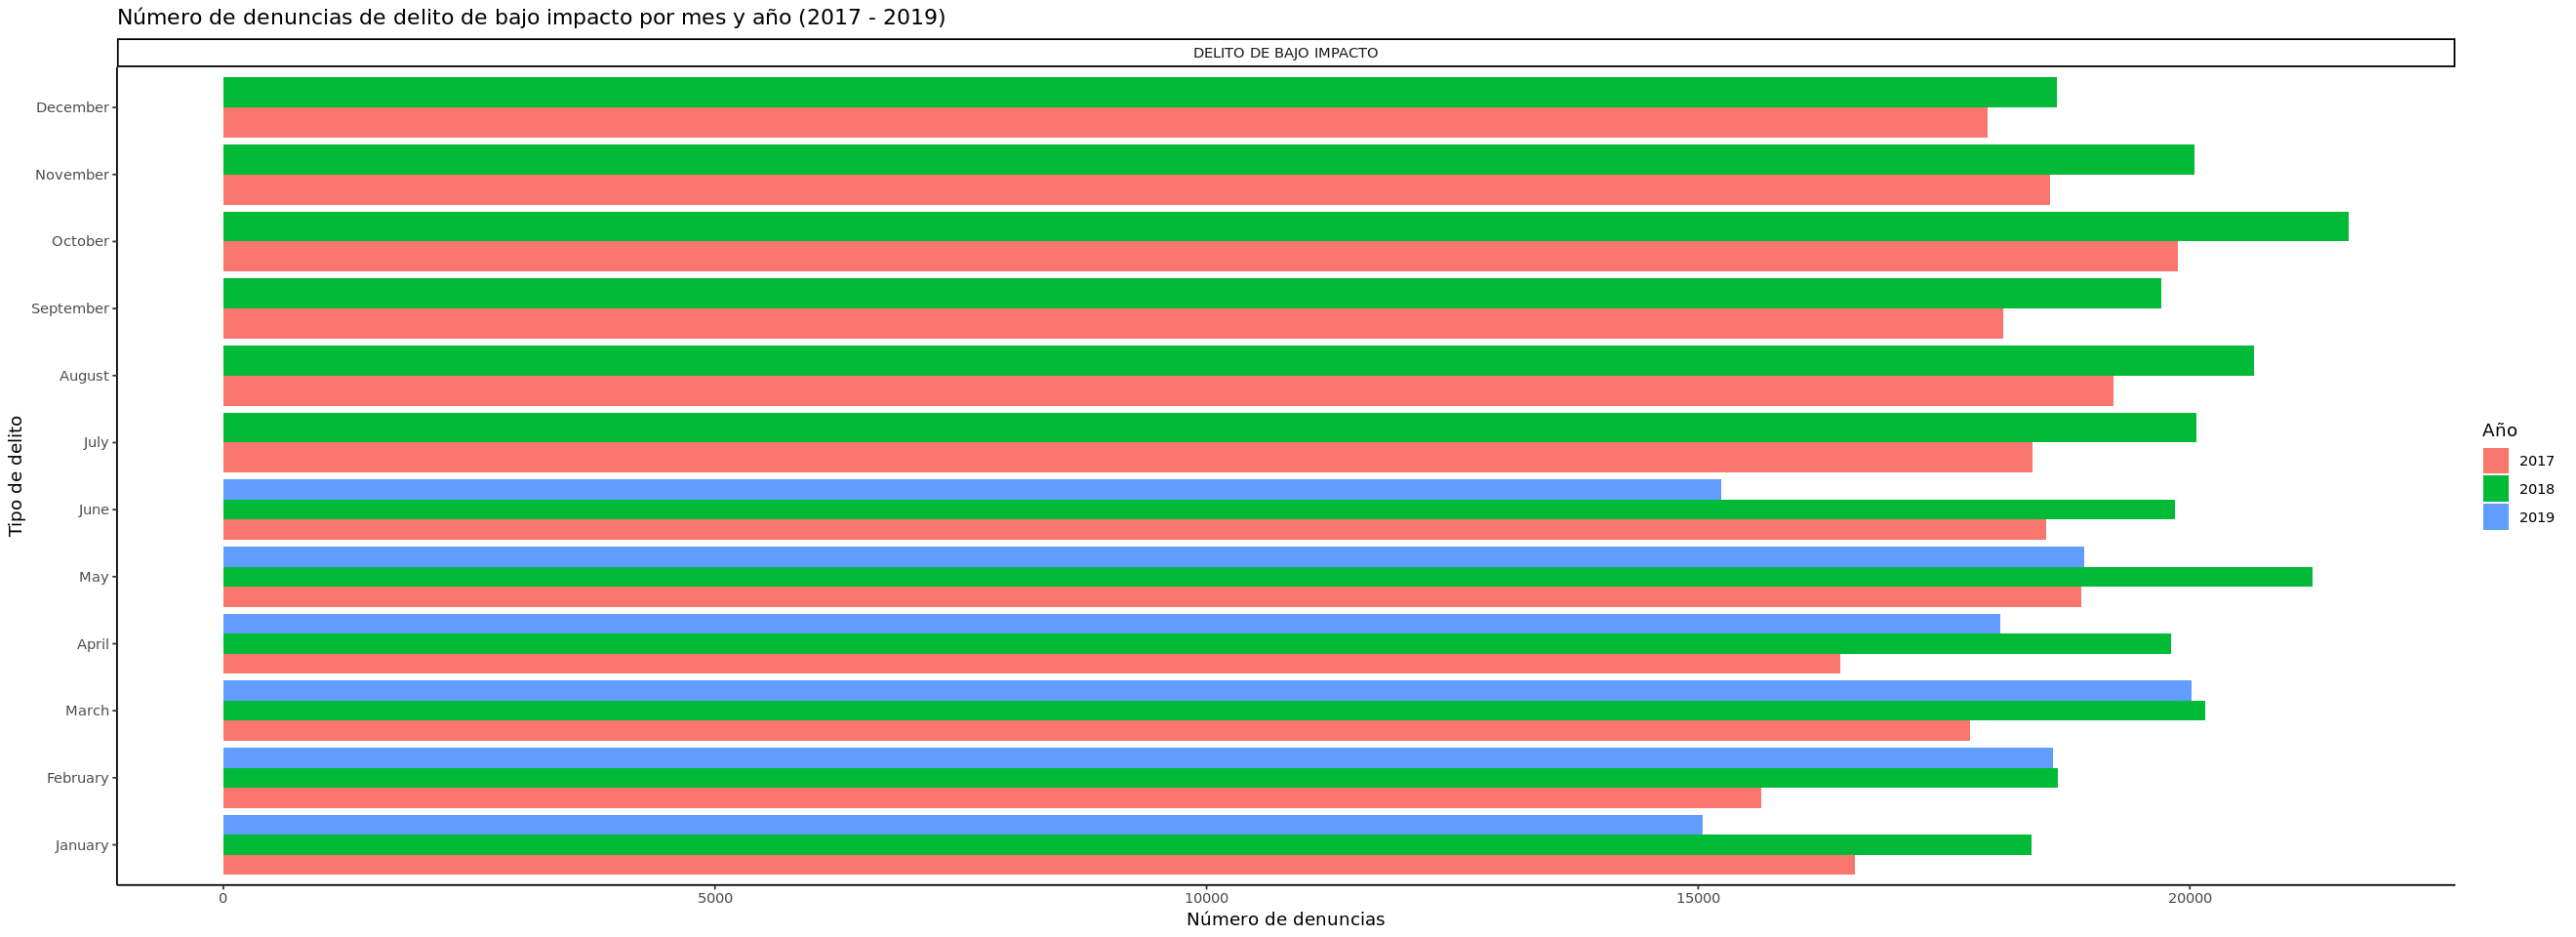

In [517]:
gp1 +
    geom_bar(aes(mes, fill = año), position = 'dodge') +
    coord_flip() +
    theme_classic() +
    facet_wrap(vars(categoria_delito[16])) +
    labs(x = 'Tipo de delito',
         y = 'Número de denuncias',
         title = 'Número de denuncias de delito de bajo impacto por mes y año (2017 - 2019)',
         fill = 'Año')

# Número de denuncias de delito de bajo impacto por mes y año (2017 - 2019)

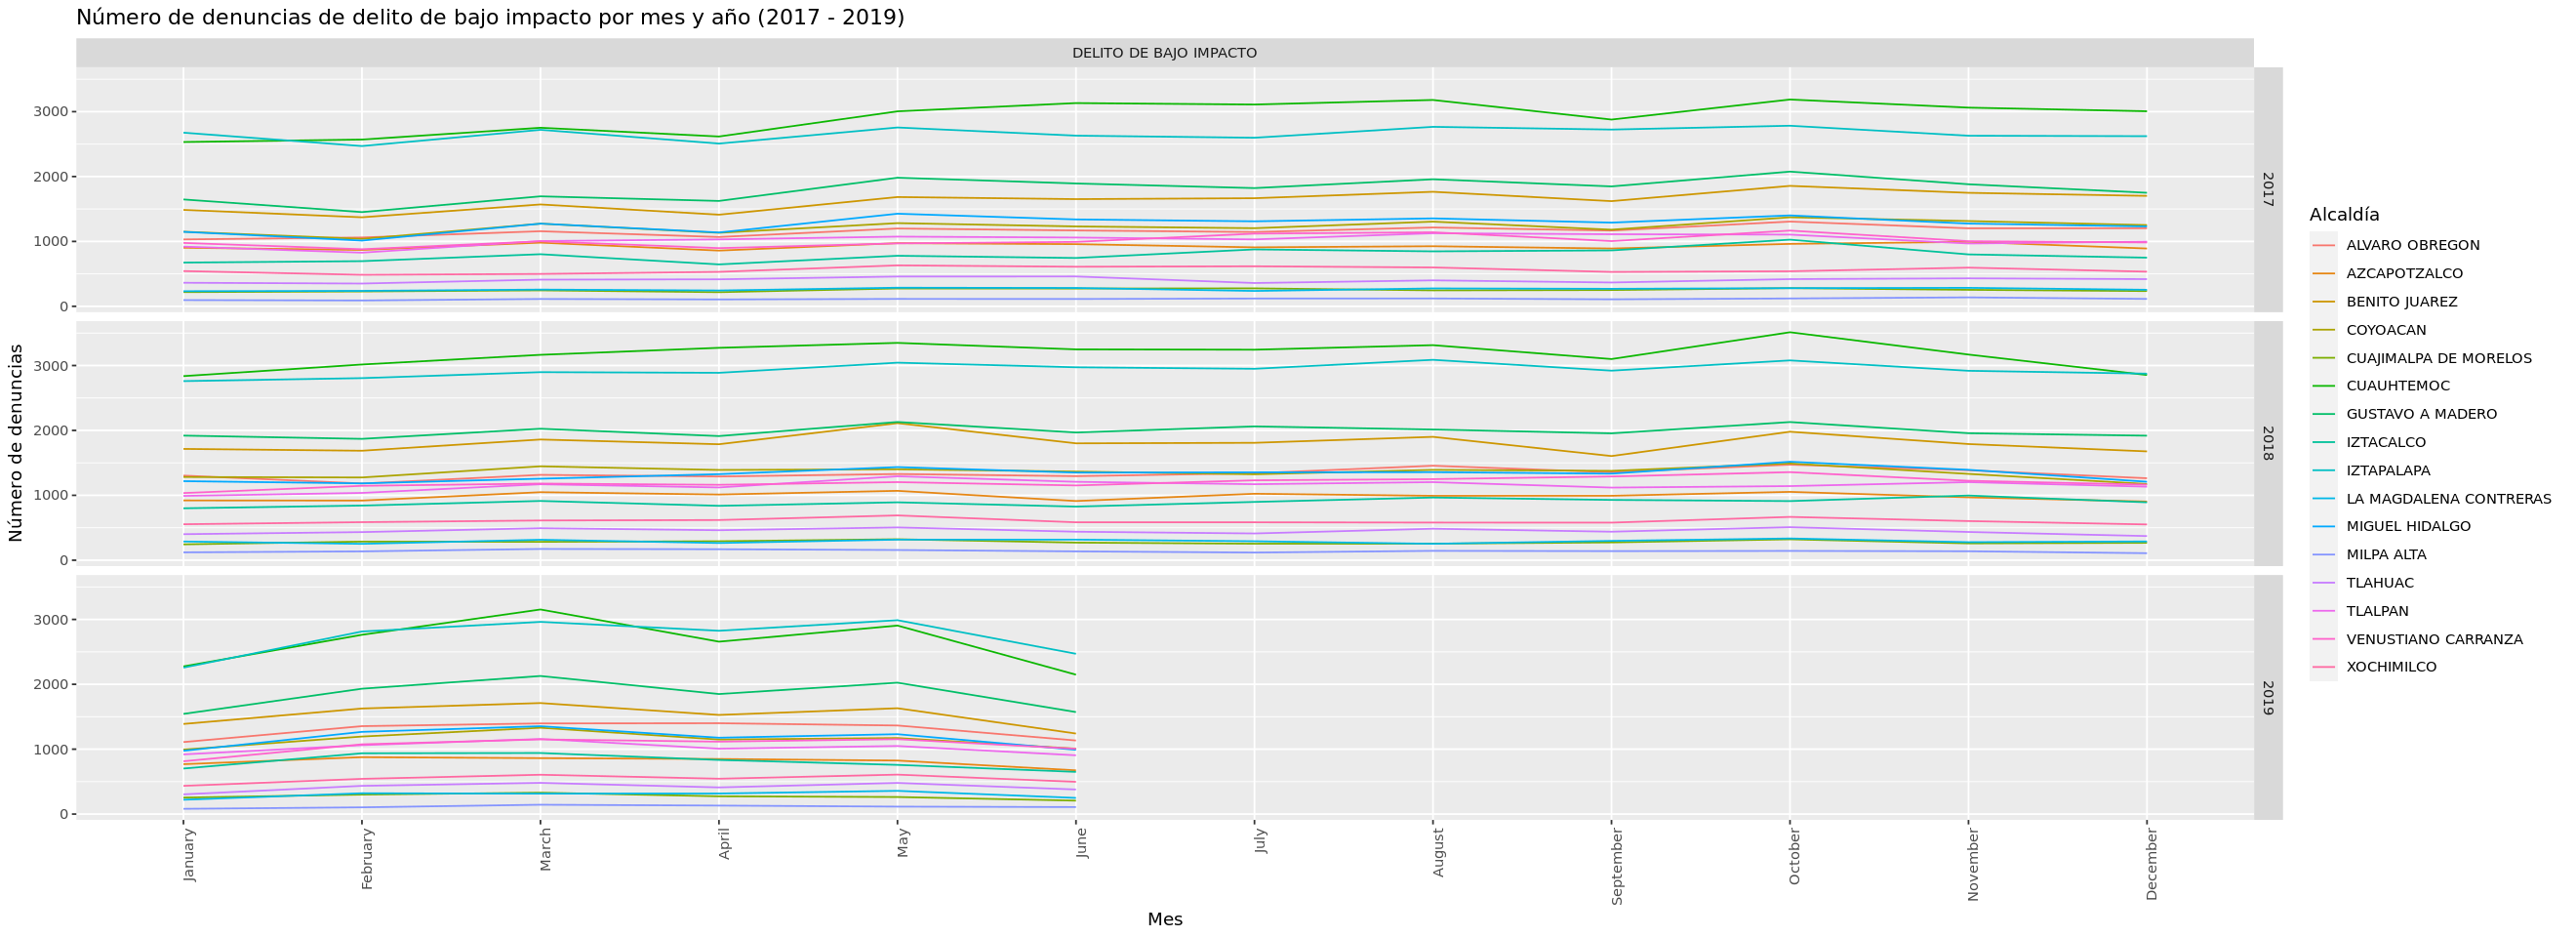

In [523]:
gp1 +
    geom_line(aes(x = mes, group = alcaldia_hechos, color = alcaldia_hechos), stat='count') +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    facet_grid(cols = vars(categoria_delito[16]), rows = vars(año)) +
    labs(x = 'Mes',
         y = 'Número de denuncias',
         title = 'Número de denuncias de delito de bajo impacto por mes y año (2017 - 2019)',
         color = 'Alcaldía')